In [ ]:
#importar las librerias necesarias
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://api.open-meteo.com/v1/forecast"
params = {
	"latitude": 52.52,
	"longitude": 13.41,
	"daily": ["weather_code", "sunrise", "rain_sum", "wind_speed_10m_max"],
	"hourly": ["temperature_2m", "weather_code", "wind_speed_10m", "soil_temperature_0cm"],
	"current": ["temperature_2m", "precipitation", "weather_code"]
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()}{response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Current values. The order of variables needs to be the same as requested.
current = response.Current()
current_temperature_2m = current.Variables(0).Value()
current_precipitation = current.Variables(1).Value()
current_weather_code = current.Variables(2).Value()

print(f"Current time {current.Time()}")
print(f"Current temperature_2m {current_temperature_2m}")
print(f"Current precipitation {current_precipitation}")
print(f"Current weather_code {current_weather_code}")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_weather_code = hourly.Variables(1).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(2).ValuesAsNumpy()
hourly_soil_temperature_0cm = hourly.Variables(3).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}

hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["weather_code"] = hourly_weather_code
hourly_data["wind_speed_10m"] = hourly_wind_speed_10m
hourly_data["soil_temperature_0cm"] = hourly_soil_temperature_0cm

hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)

# Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_weather_code = daily.Variables(0).ValuesAsNumpy()
daily_sunrise = daily.Variables(1).ValuesInt64AsNumpy()
daily_rain_sum = daily.Variables(2).ValuesAsNumpy()
daily_wind_speed_10m_max = daily.Variables(3).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}

daily_data["weather_code"] = daily_weather_code
daily_data["sunrise"] = daily_sunrise
daily_data["rain_sum"] = daily_rain_sum
daily_data["wind_speed_10m_max"] = daily_wind_speed_10m_max

daily_dataframe = pd.DataFrame(data = daily_data)
print(daily_dataframe)

Coordinates 52.52000045776367°N 13.419998168945312°E
Elevation 38.0 m asl
Timezone NoneNone
Timezone difference to GMT+0 0 s
Current time 1744333200
Current temperature_2m 7.0
Current precipitation 0.0
Current weather_code 3.0
                         date  temperature_2m  weather_code  wind_speed_10m  \
0   2025-04-11 00:00:00+00:00        7.845500           3.0       18.289274   
1   2025-04-11 01:00:00+00:00        6.995500           3.0       21.194187   
2   2025-04-11 02:00:00+00:00        6.045500           3.0       21.252199   
3   2025-04-11 03:00:00+00:00        6.295500           3.0       19.008547   
4   2025-04-11 04:00:00+00:00        6.545500           3.0       19.930477   
..                        ...             ...           ...             ...   
163 2025-04-17 19:00:00+00:00        9.369500          61.0        8.427383   
164 2025-04-17 20:00:00+00:00        9.119500          61.0        7.628263   
165 2025-04-17 21:00:00+00:00        8.919499          61.0   

Visualización de Datos CLima

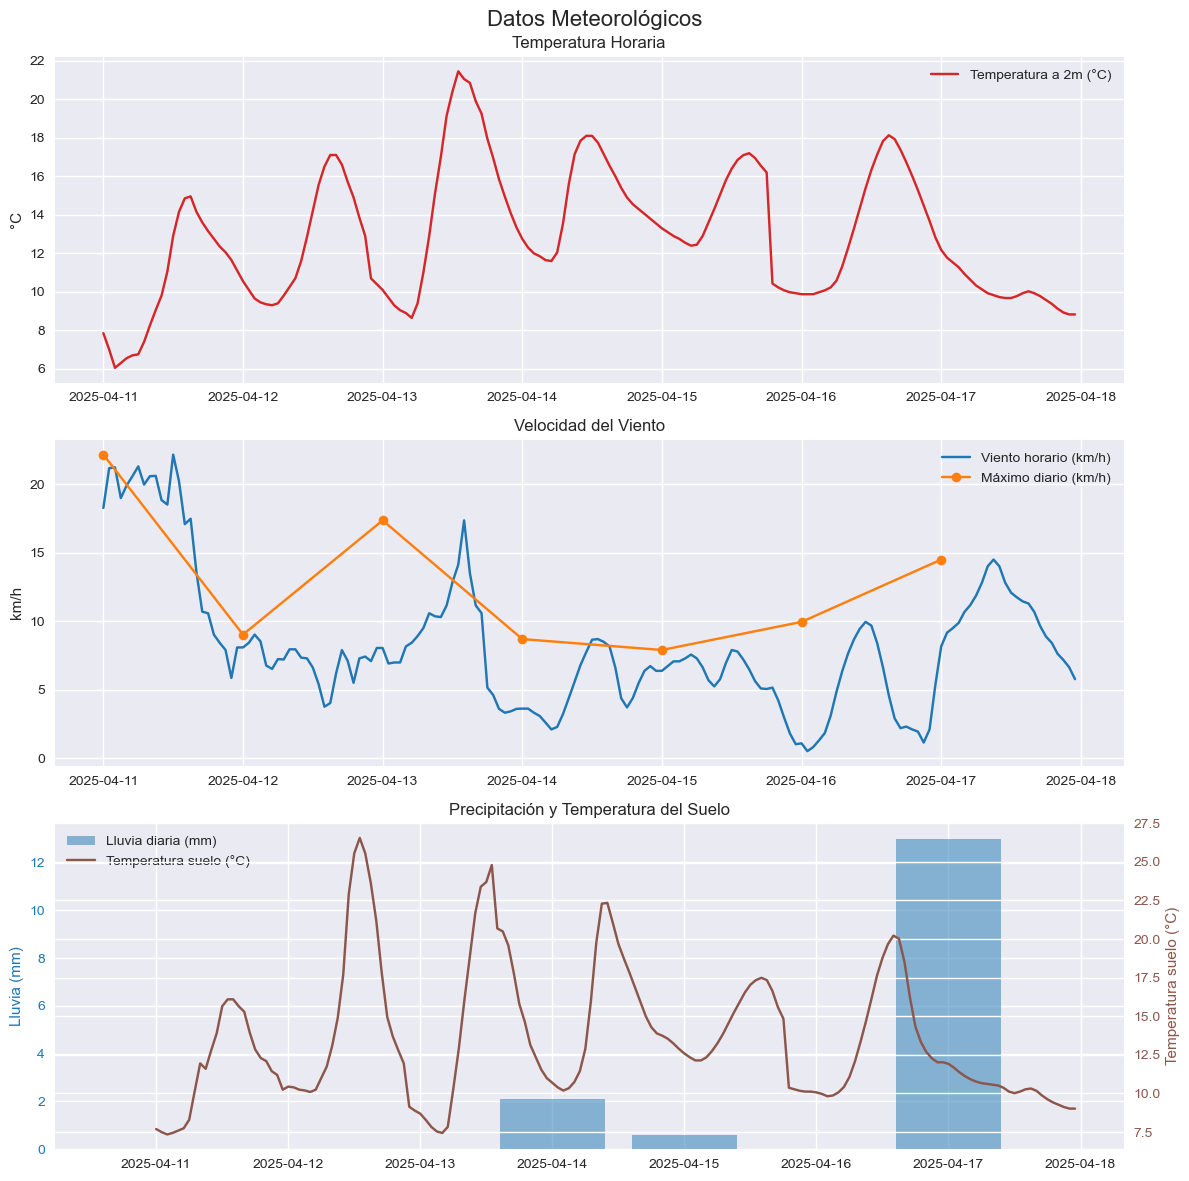

In [ ]:
git commit -m "Añadiendo archivo de clima.ipynb"

# Visualización de Datos Meteorológicos

Proyecto para obtener y visualizar datos climáticos usando la API de Open-Meteo.

## 📊 Gráficos Generados
![Gráficos Meteorológicos](plots/weather_plot.png)

## 🛠 Instalación
1. Clona el repositorio:
   ```bash
   git clone https://github.com/tu-usuario/clima-visualizacion.git

Subir a Github